<a href="https://colab.research.google.com/github/KeonhoChu/KDT-/blob/main/Heart_Attack_Analysis_%26_Prediction_Dataset_23_04_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,precision_score,recall_score

import warnings
warnings.filterwarnings("ignore")



age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

In [2]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/Heart Attack Analysis & Prediction Dataset/heart.csv')


In [3]:
df.shape


(303, 14)

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('output',axis = 1), df['output'], test_size = 0.2 , random_state= 42)

model  = RandomForestClassifier() # 모델 생성 후 피팅 
model.fit(x_train,y_train)


RandomForestClassifier()

In [8]:
pred = model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
pre_score = precision_score(y_test,pred)
recall = recall_score(y_test,pred)

print(f'민감도 : {acc_score}', f'정확도 : {pre_score}',f'Recall : {recall}', sep = ' | ') 



민감도 : 0.8524590163934426 | 정확도 : 0.8484848484848485 | Recall : 0.875


In [9]:
dephts = range(1,26)

avg_score = {}

for depth in tqdm(dephts):
    
    model = RandomForestClassifier(max_depth= depth)
    
    avg_score[depth] = np.mean(cross_val_score(model,x_train,y_train, cv = 10))

100%|██████████| 25/25 [00:52<00:00,  2.12s/it]


Text(0.5, 1.0, 'Best Depth is 3 \n score : 0.83')

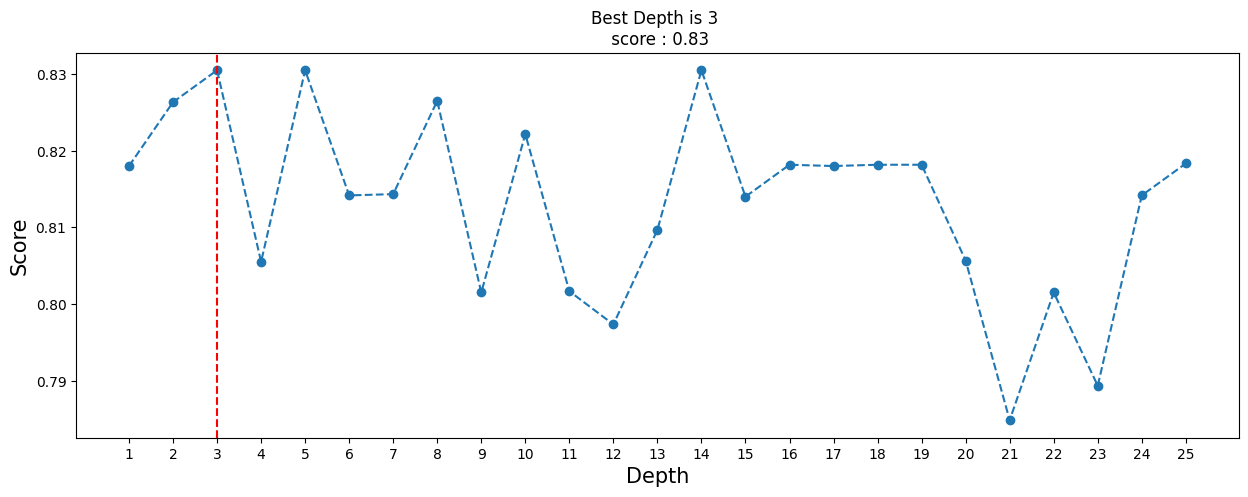

In [10]:
idx = max(avg_score, key = avg_score.get)

plt.figure(figsize = [15,5])
plt.plot(avg_score.keys(), avg_score.values(), marker = 'o', ls = '--')
plt.xticks(ticks = range(1,26))
plt.axvline(idx, ls = '--', c = 'r')
plt.xlabel('Depth', fontdict= {'size': 15})
plt.ylabel('Score', fontdict= {'size': 15})
plt.title(f'Best Depth is {idx} \n score : {round(avg_score[idx],2)}')

In [11]:
dephts = range(1,26)

gini_avg_score = {}
entropy_avg_score = {}

for depth in tqdm(dephts):
    
    gini_model = RandomForestClassifier(criterion='gini',max_depth= depth)
    entrypy_model = RandomForestClassifier(criterion='entropy',max_depth= depth)
    
    gini_avg_score[depth] = np.mean(cross_val_score(gini_model,x_train,y_train, cv = 10))
    entropy_avg_score[depth] = np.mean(cross_val_score(gini_model,x_train,y_train, cv = 10))

100%|██████████| 25/25 [01:21<00:00,  3.27s/it]


Text(0.5, 1.0, 'different of best Depth according to critertion(Gini,Entropy)')

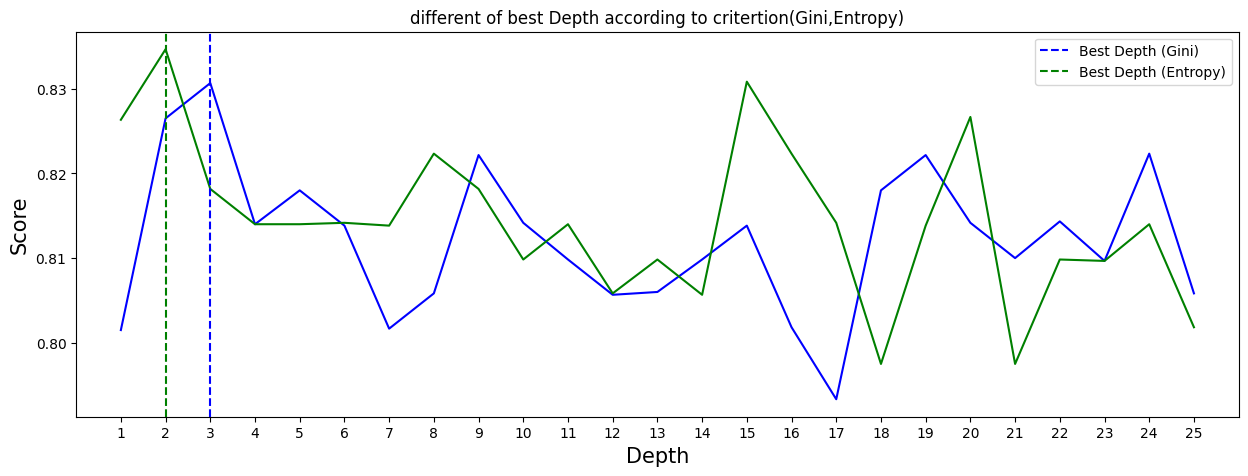

In [12]:
plt.figure(figsize = [15,5])

gini_idx = max(gini_avg_score, key = gini_avg_score.get)
entropy_idx = max(entropy_avg_score, key = entropy_avg_score.get)

plt.plot(gini_avg_score.keys(), gini_avg_score.values(),c = 'b')
plt.plot(entropy_avg_score.keys(), entropy_avg_score.values(),c = 'g')

plt.axvline(gini_idx, ls = '--', c = 'b', label = 'Best Depth (Gini)')
plt.axvline(entropy_idx, ls = '--', c = 'g', label = 'Best Depth (Entropy)')


plt.xticks(ticks = range(1,26))
plt.xlim([0,26])

plt.xlabel('Depth', fontdict= {'size': 15})
plt.ylabel('Score', fontdict= {'size': 15})

plt.legend()  
plt.title("different of best Depth according to critertion(Gini,Entropy)")



In [13]:
model = RandomForestClassifier()
print(model.estimator_params)

('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha')


In [14]:
param_grid = {'criterion':['gini','entropy'],
               'n_estimators':[50,80,100],
               'max_depth' : range(1,30,5),
                'max_leaf_nodes' : [30,40,50],
                'max_features' : ['auto','sqrt','log2']}


grid_rf = GridSearchCV(estimator = model, param_grid= param_grid, verbose= 1 ,cv = 10, n_jobs= -1) #위에서 setting 한 parameter 종류로 crossvalidation 예정 
grid_rf.fit(x_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30, 5),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [30, 40, 50],
                         'n_estimators': [50, 80, 100]},
             verbose=1)

In [15]:
result = pd.DataFrame(grid_rf.cv_results_)

display(result[['params','mean_test_score']].sort_values(by = 'mean_test_score',ascending= False))

print('--' * 40)

print(grid_rf.best_params_) # 최적의 parameter print

,params,mean_test_score
57,"{'criterion': 'gini', 'max_depth': 11, 'max_fe...",0.843000
155,"{'criterion': 'gini', 'max_depth': 26, 'max_fe...",0.839000
13,"{'criterion': 'gini', 'max_depth': 1, 'max_fea...",0.838833
40,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.835000
133,"{'criterion': 'gini', 'max_depth': 21, 'max_fe...",0.834833
...,...,...
161,"{'criterion': 'gini', 'max_depth': 26, 'max_fe...",0.789000
49,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.785167
174,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.785167
45,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.784833


--------------------------------------------------------------------------------
{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'max_leaf_nodes': 40, 'n_estimators': 50}


In [17]:
grid_model = grid_rf.best_estimator_ #최적의 파라미터를 가진 모델을 생성

grid_model.fit(x_train,y_train)

grid_pred = grid_model.predict(x_test)